In [1]:
import matplotlib.pyplot as plt

from edf.visual_utils import visualize_samples, visualize_sample_cluster
from edf.utils import voxelize_sample

import gzip
import pickle

folder_name = 'demo'
file_name = 'mug_task_mixed.gzip'
path = f'{folder_name}/{file_name}'

with gzip.open(path,'rb') as f:
    samples = pickle.load(f)

pybullet build time: Dec  1 2021 18:34:28


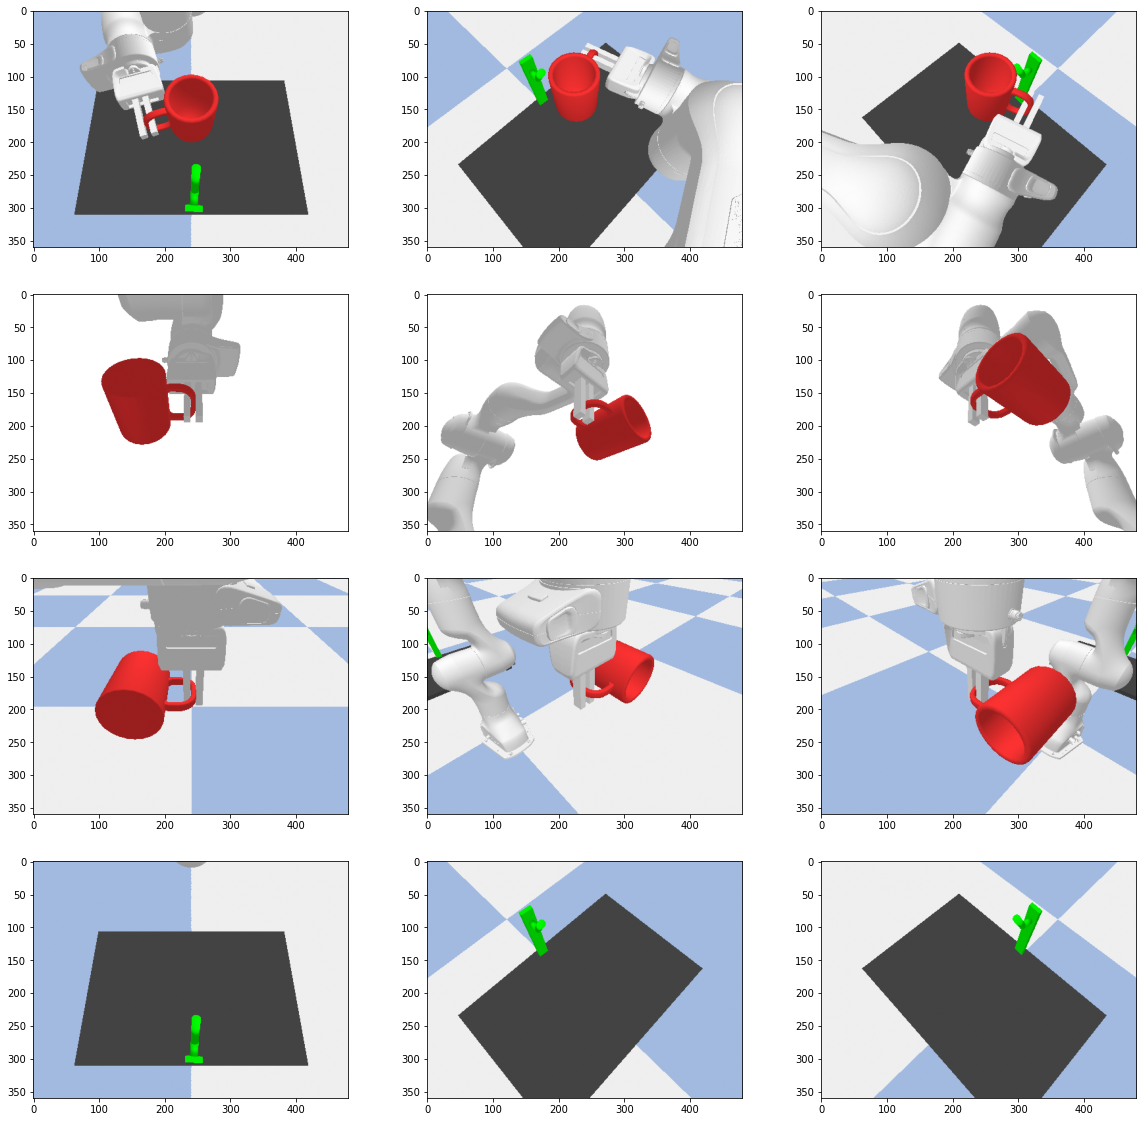

In [2]:
sample = samples[0]

fig, axes = plt.subplots(4,3, figsize=(20,20))
for j in range(3):
    axes[0,j].imshow(sample['images'][j]['color'])
for j in range(3):
    axes[1,j].imshow(sample['images_pick'][j]['color'])
for j in range(3):
    axes[2,j].imshow(sample['images_pick'][j+3]['color'])
for j in range(3):
    axes[3,j].imshow(sample['images_place'][j]['color'])

# Sample Demonstration

- Point clouds (Scene before pick / Gripper after pick / Scene before place)
- End Effector Pose generated by oracle policy (Visualized as RGB frame)

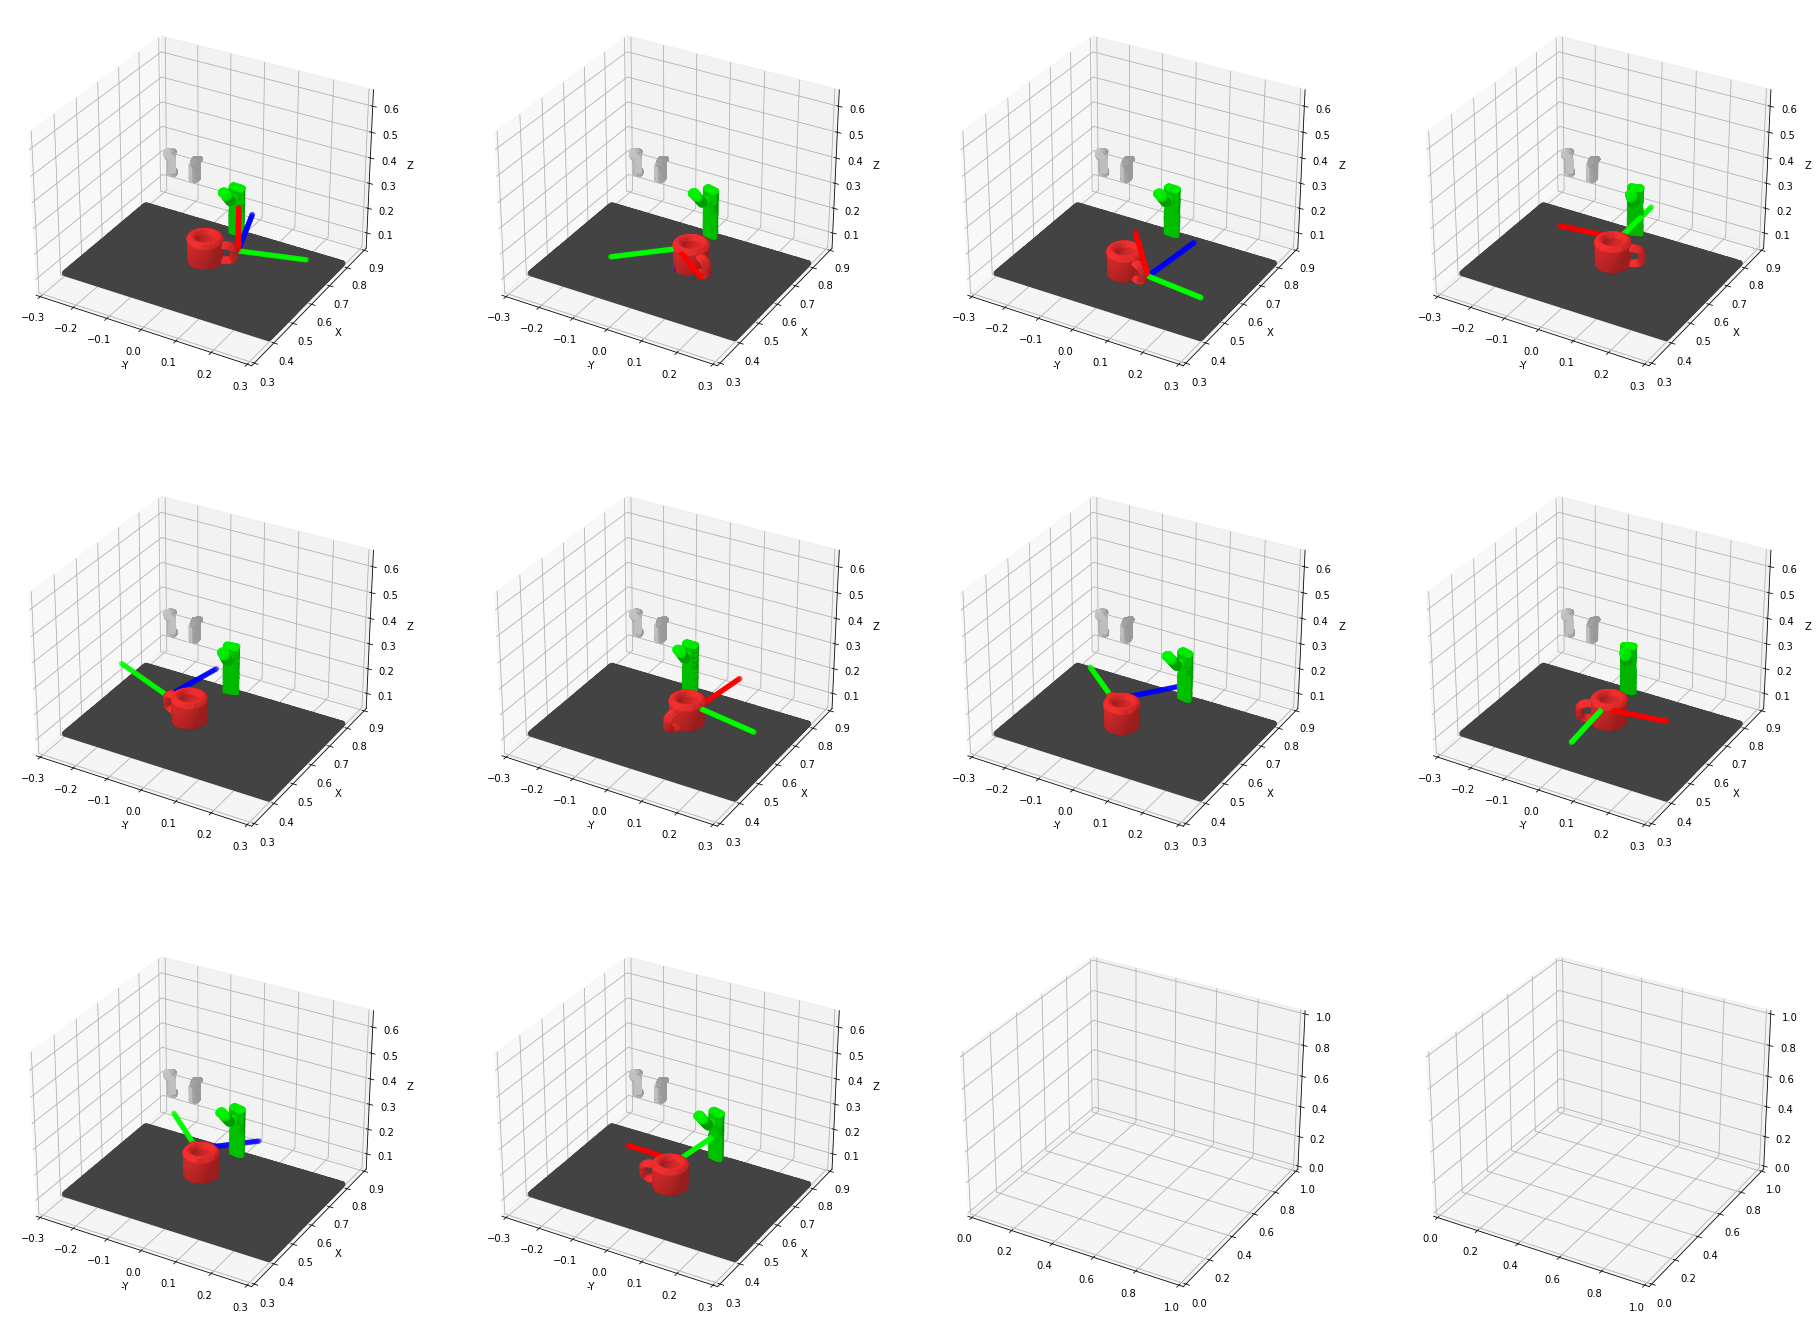

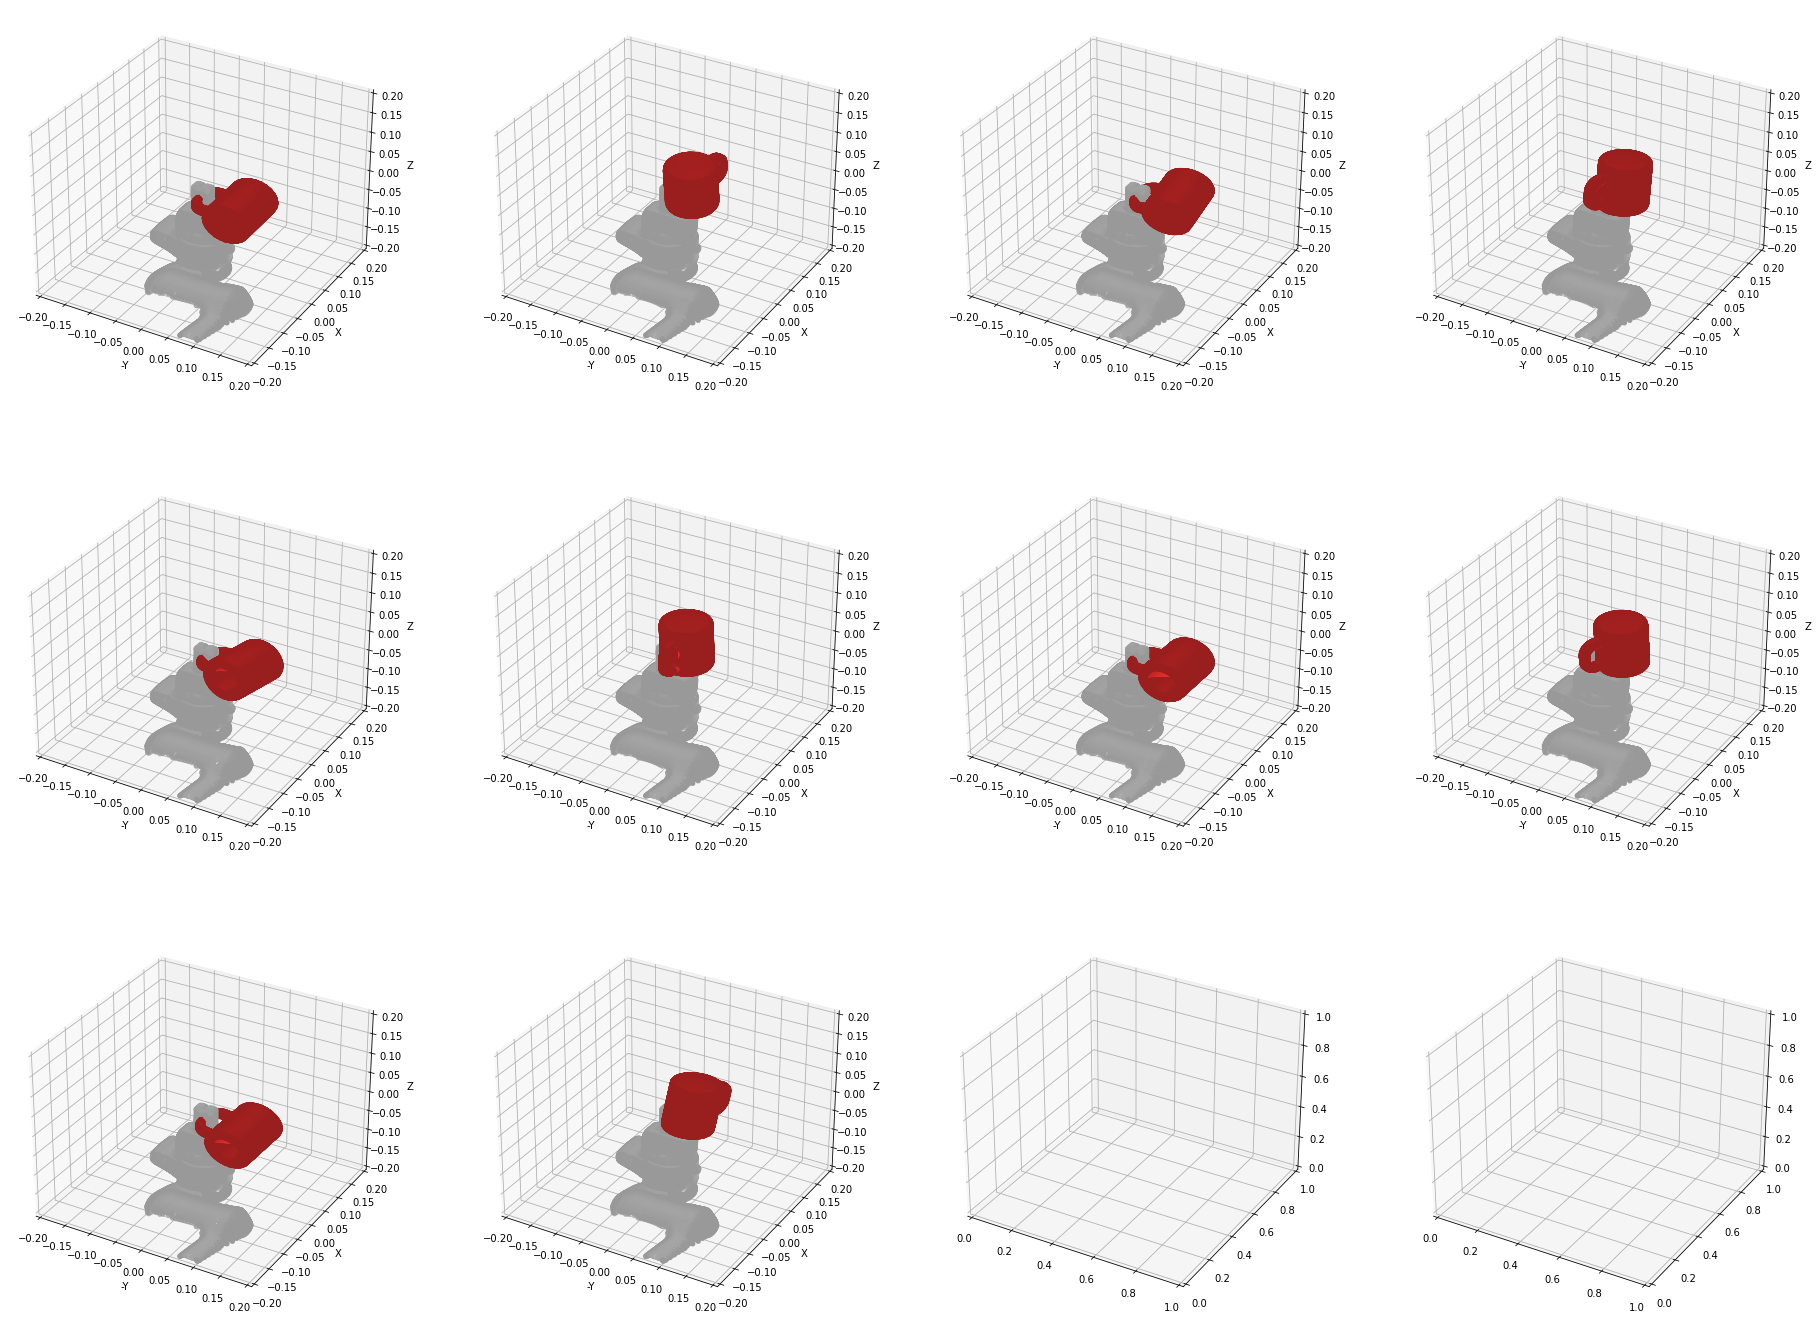

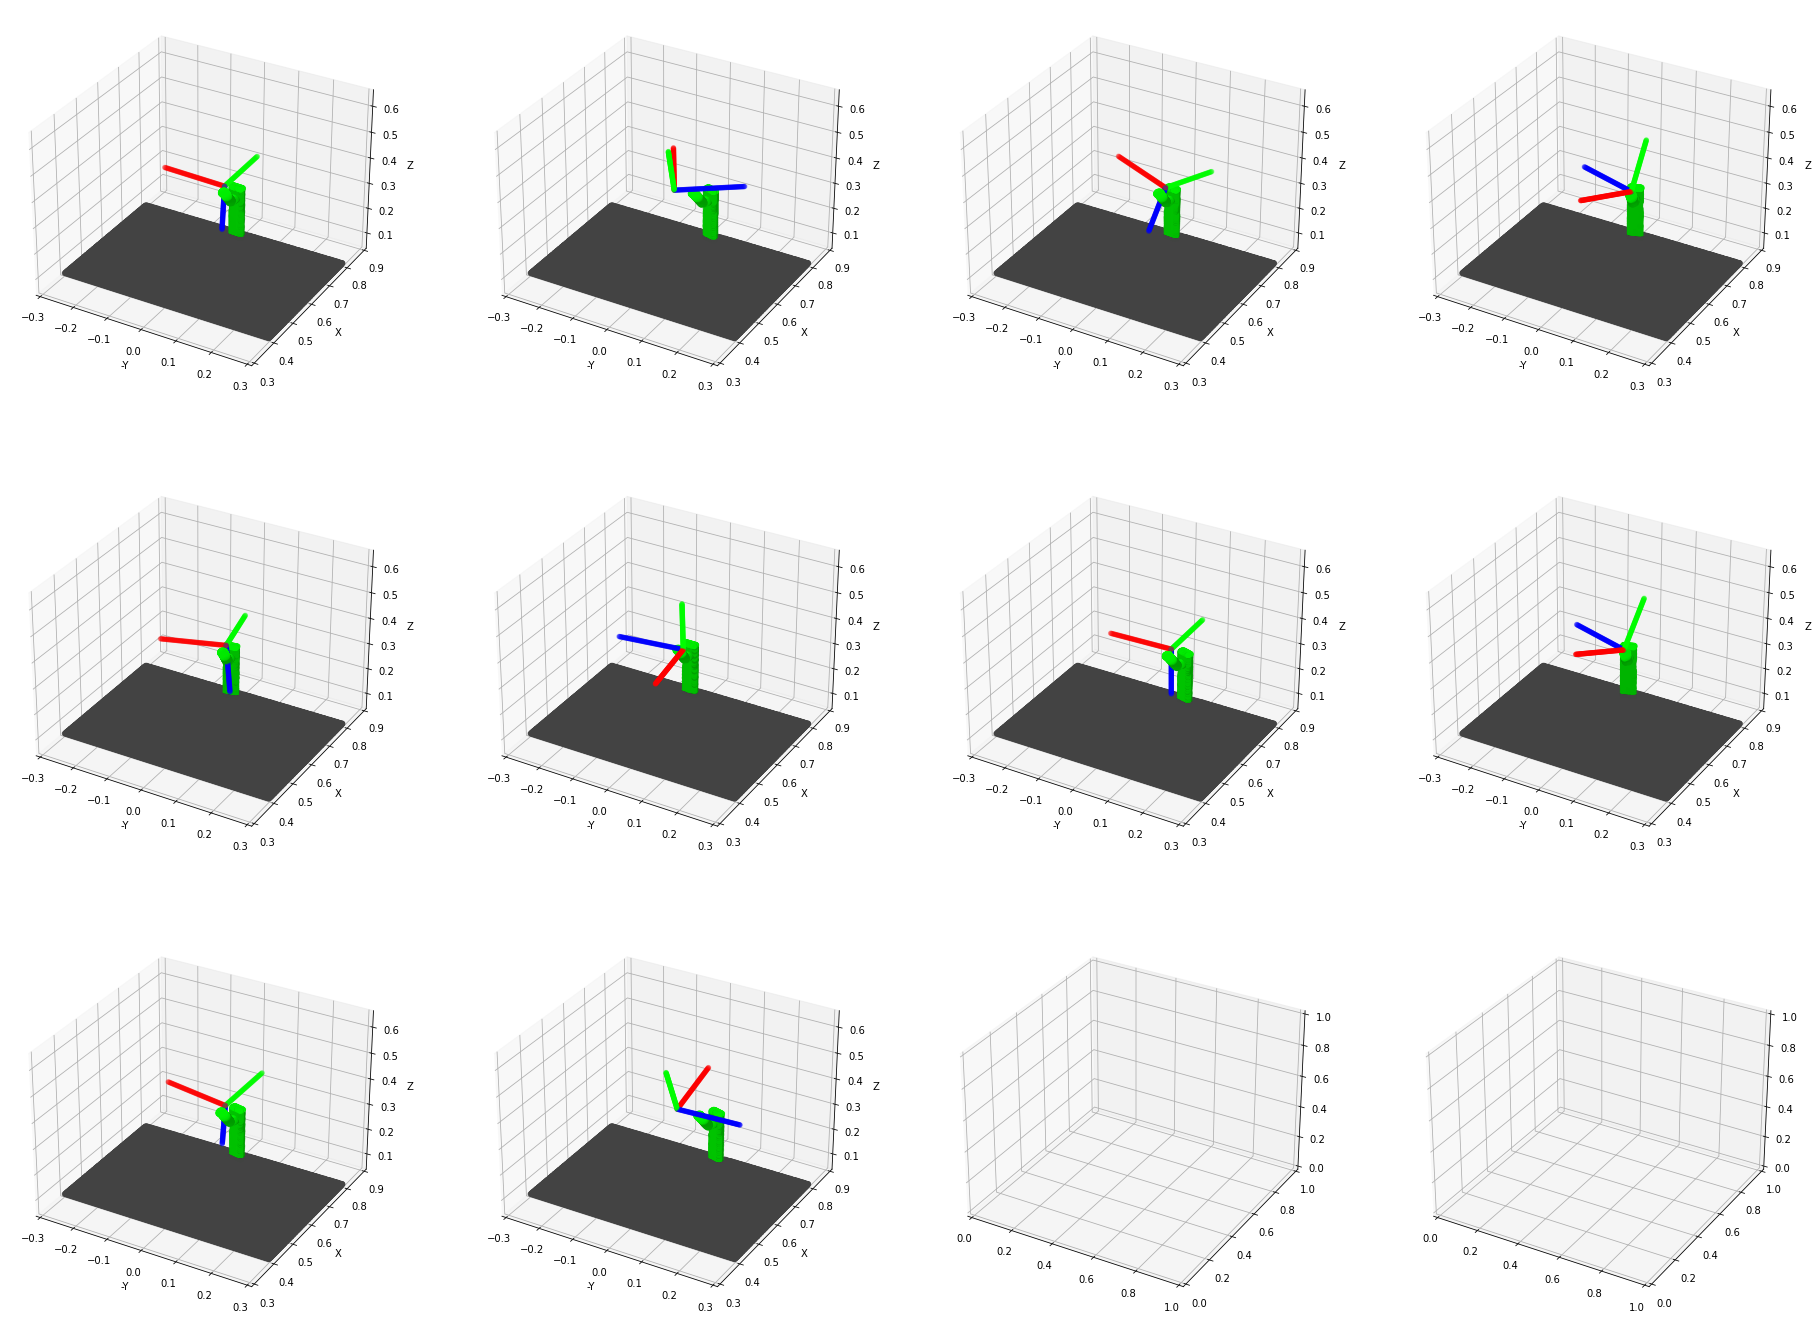

In [3]:
visualize_samples(samples)

# Voxelize

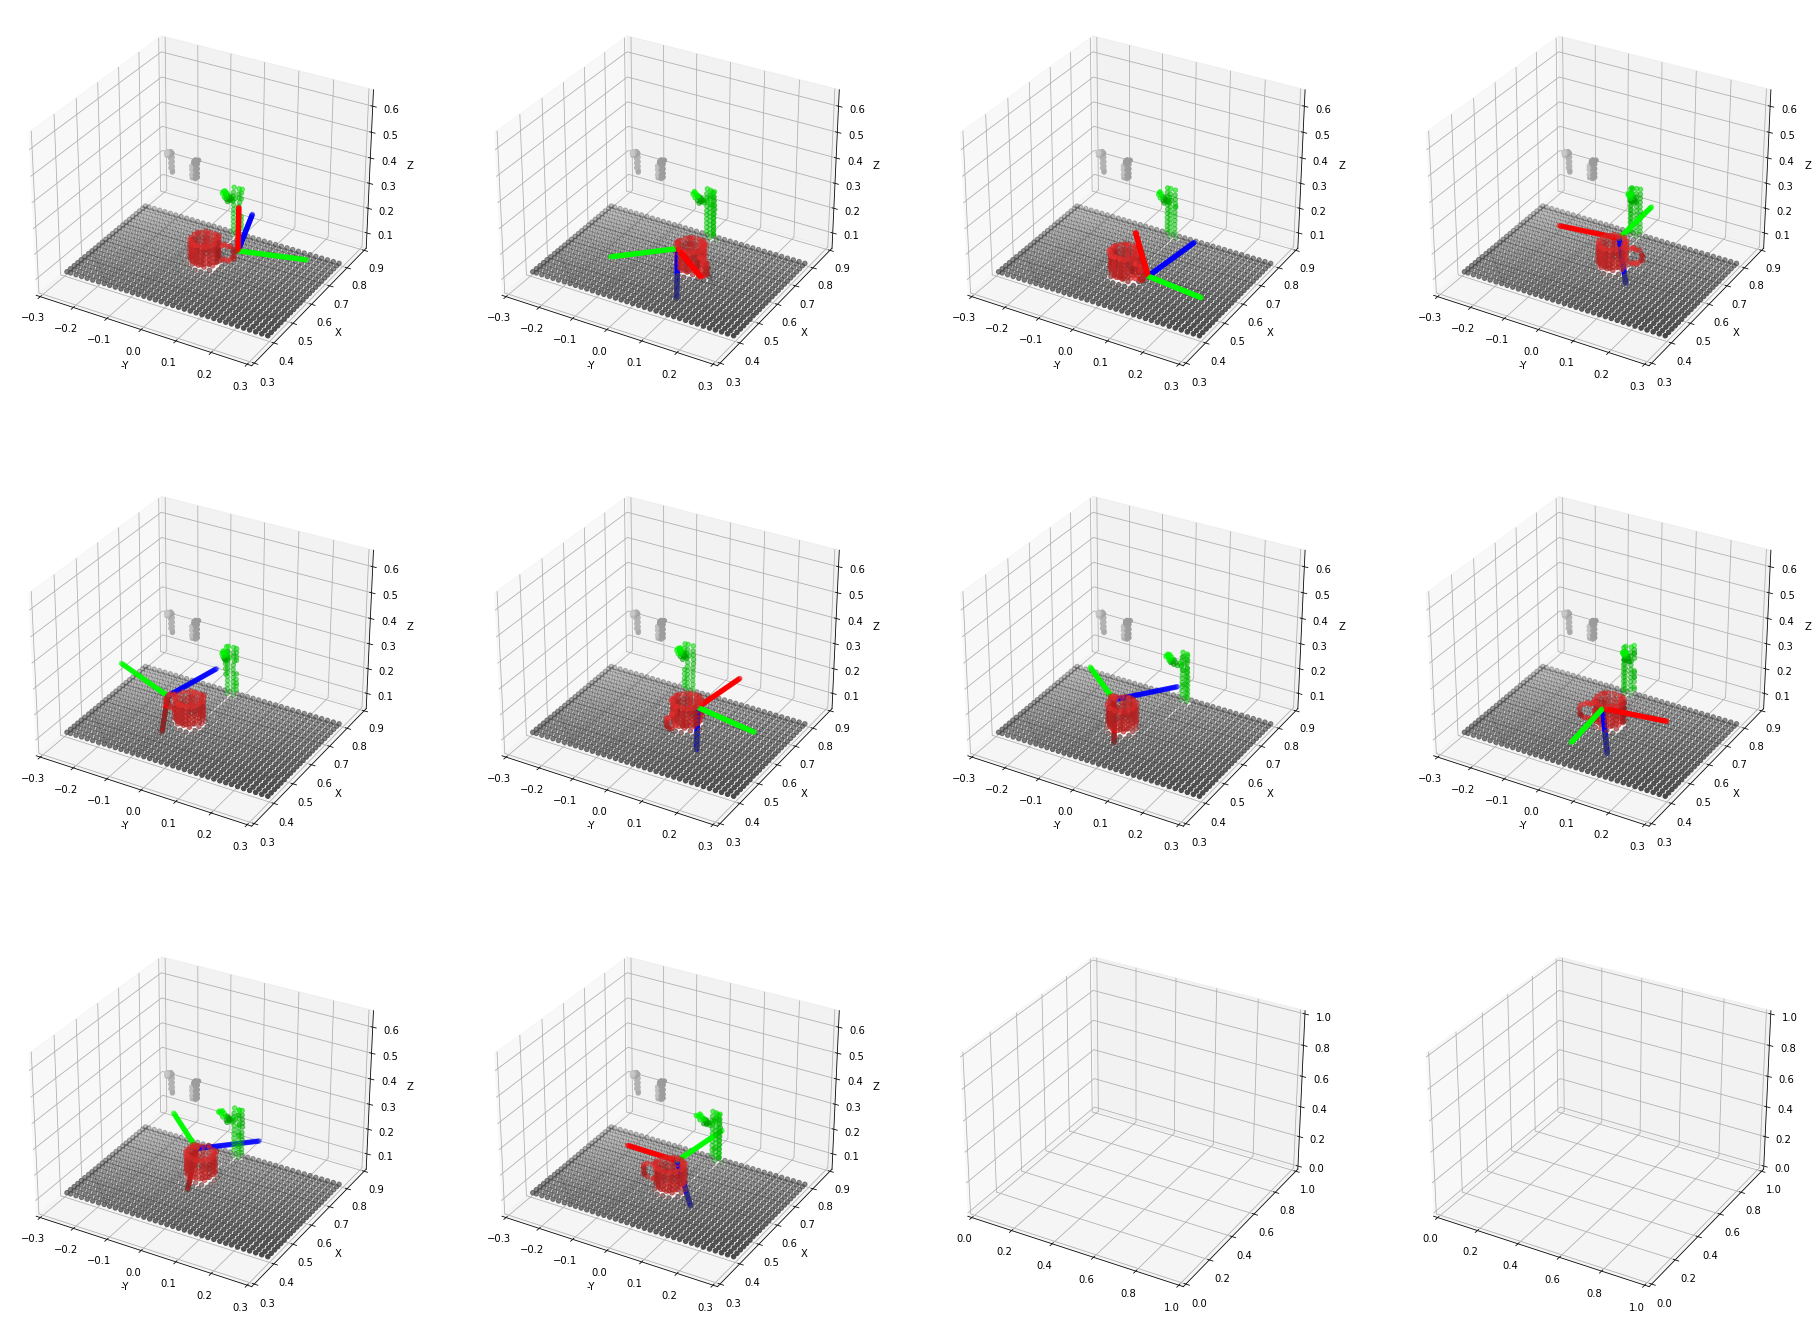

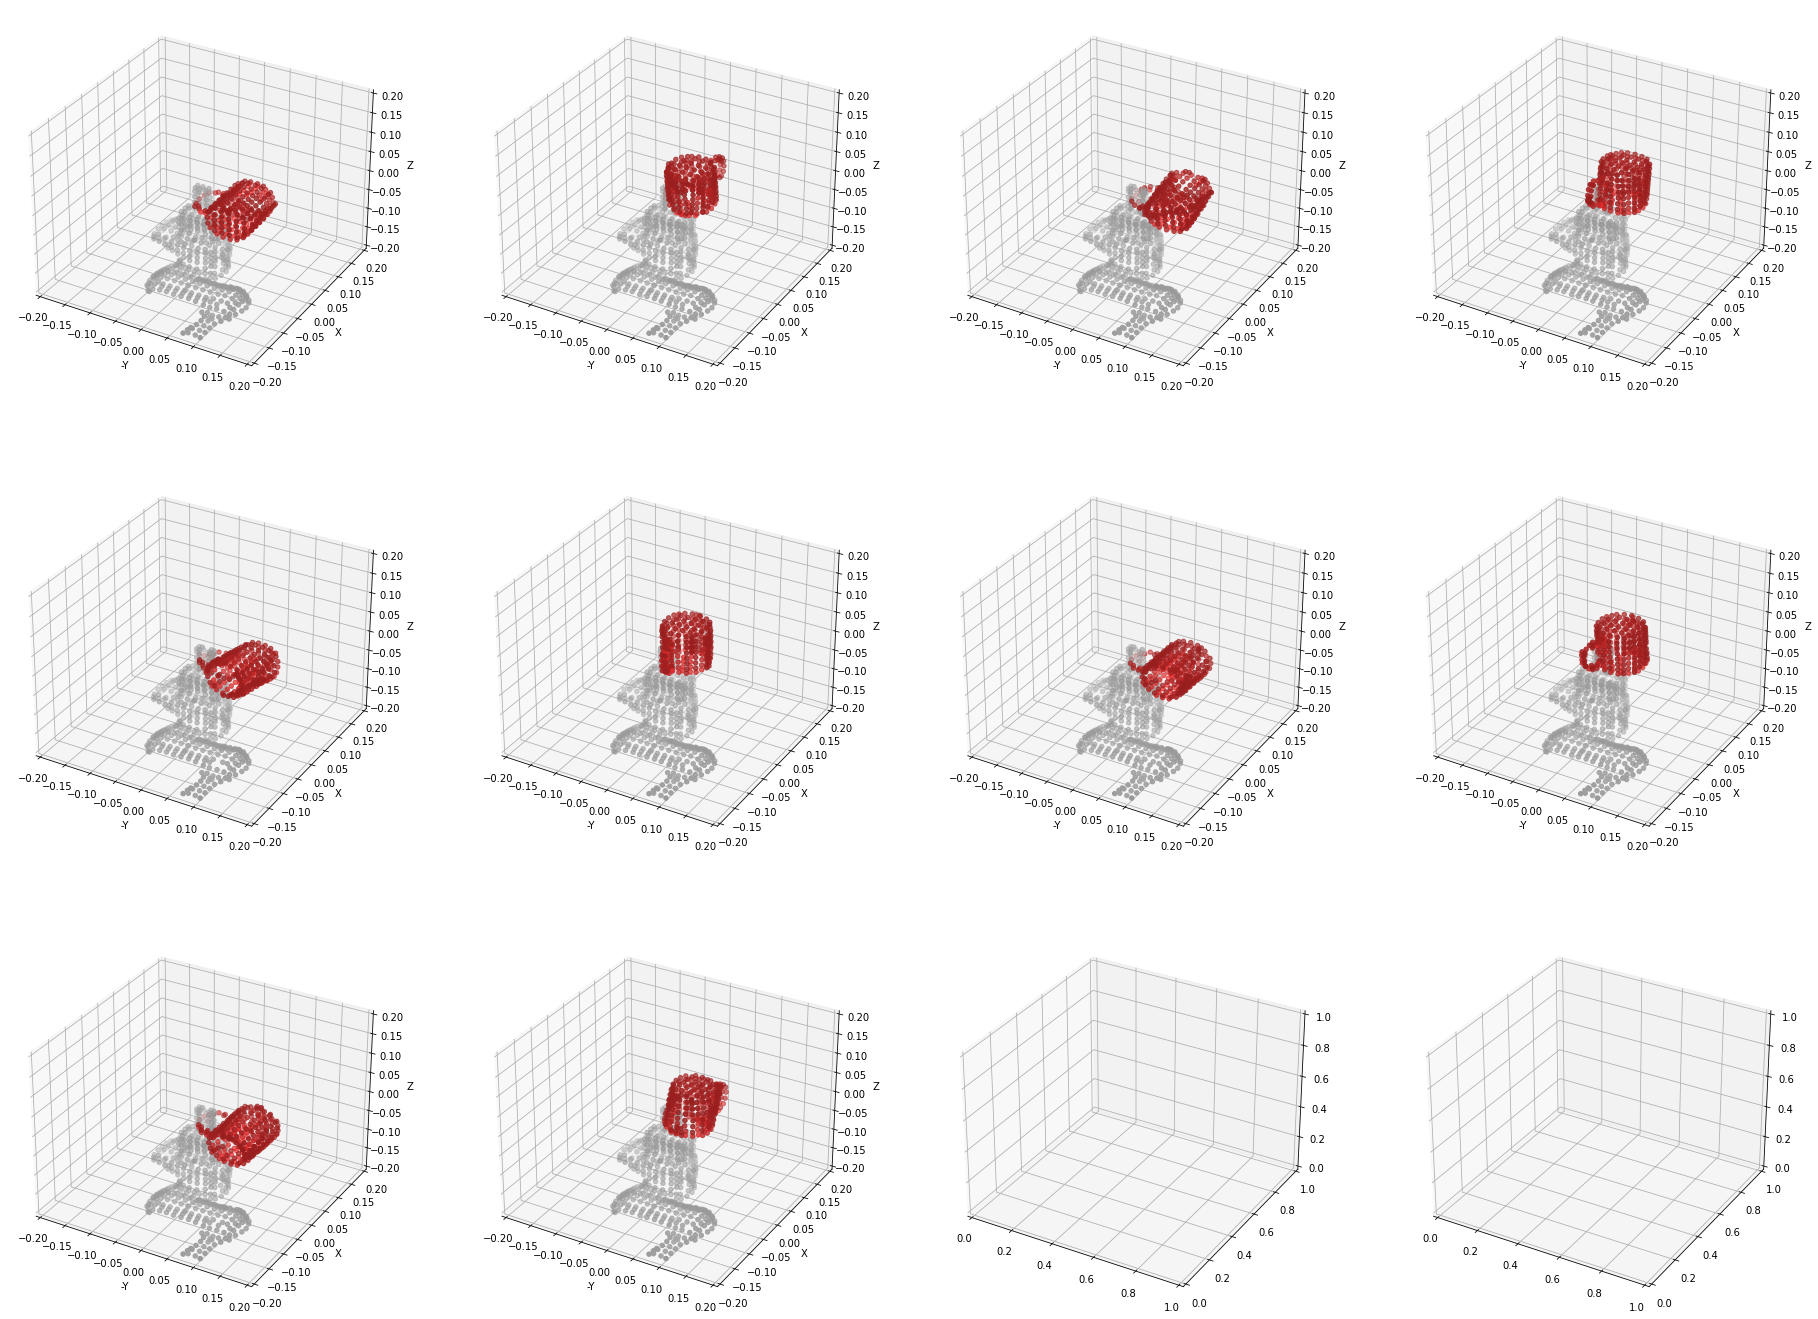

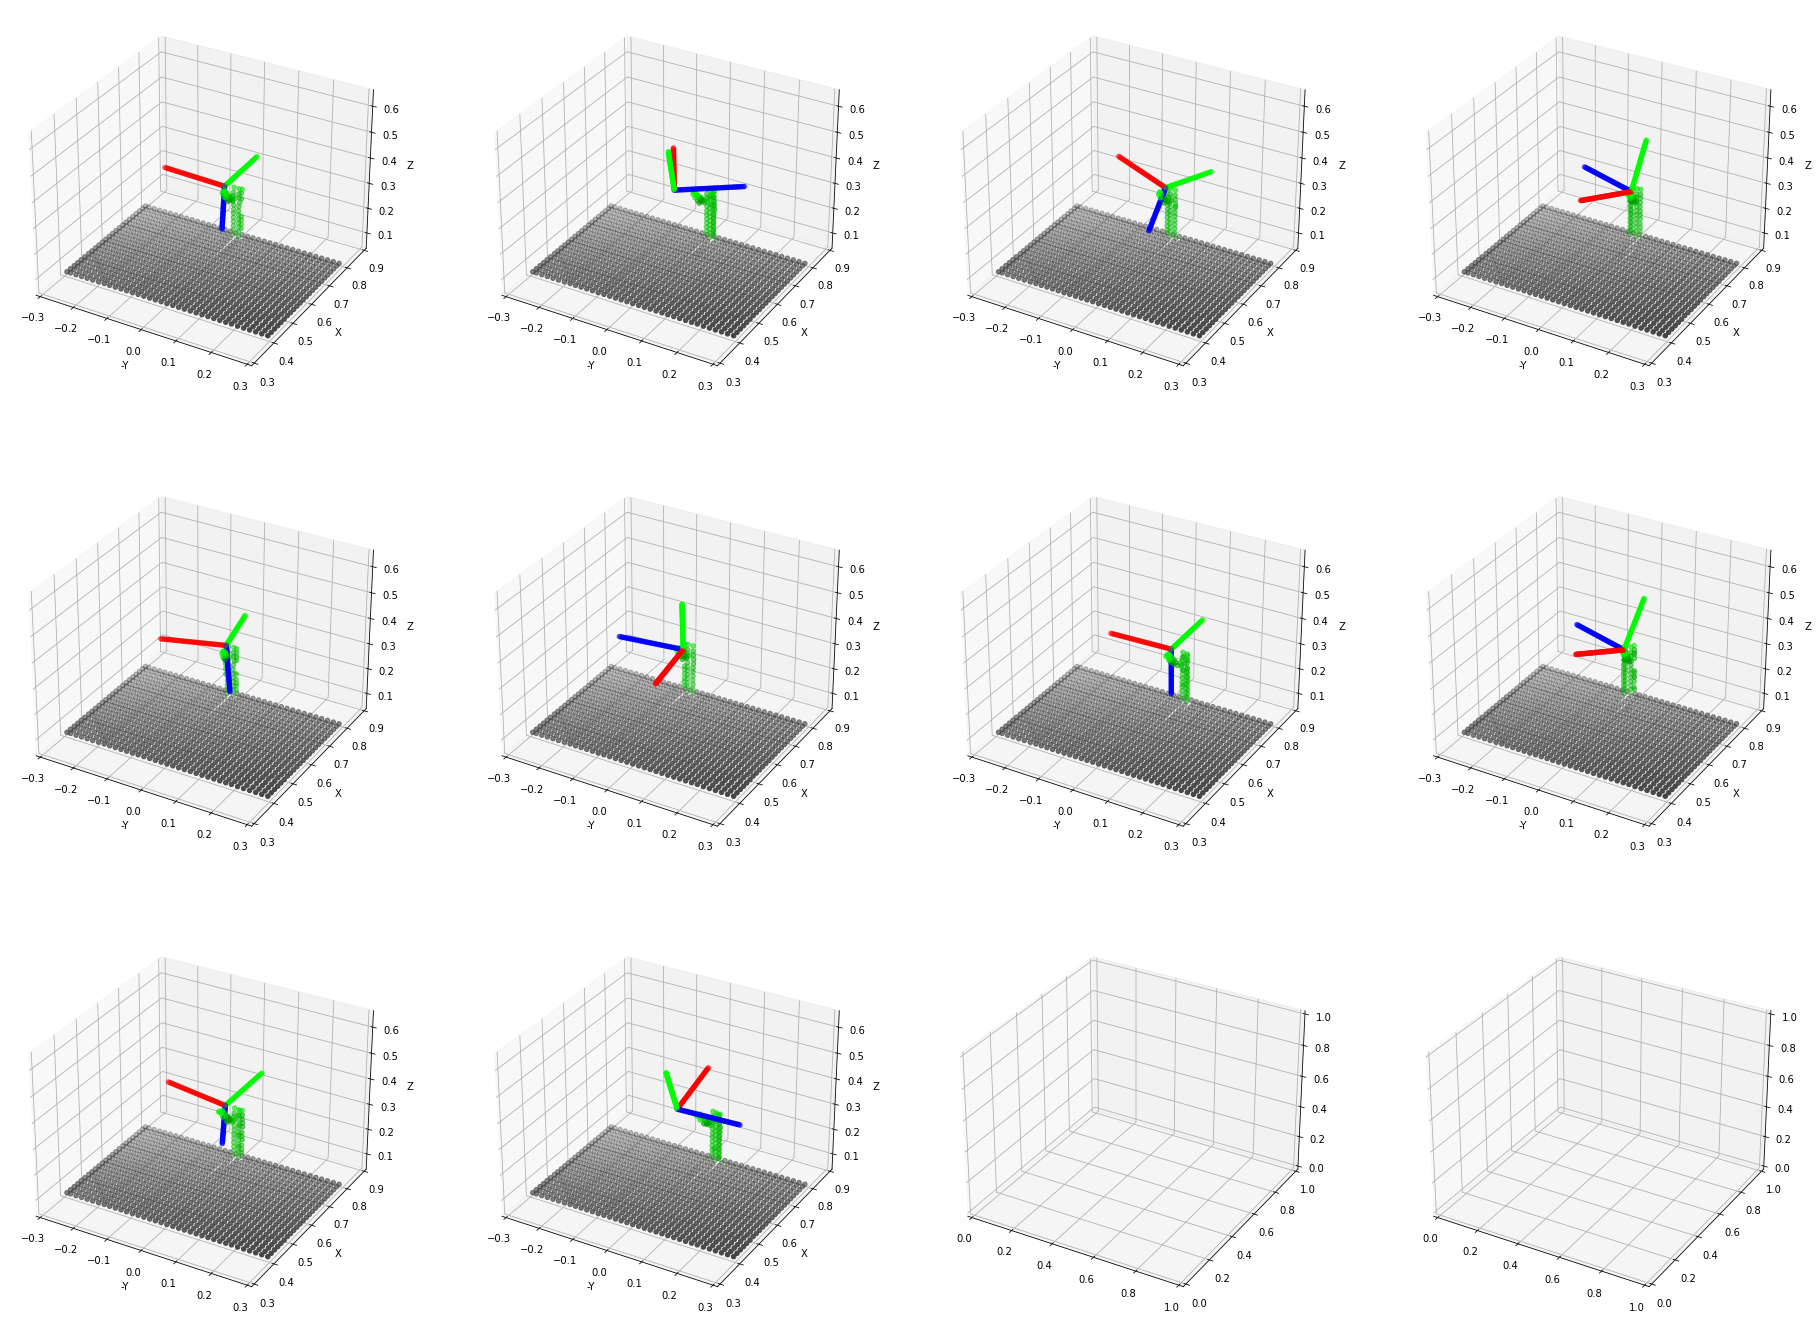

In [4]:
voxelized_samples = []
for sample in samples[:]:
    sample = voxelize_sample(sample)
    voxelized_samples.append(sample)
visualize_samples(voxelized_samples)

# Jitter

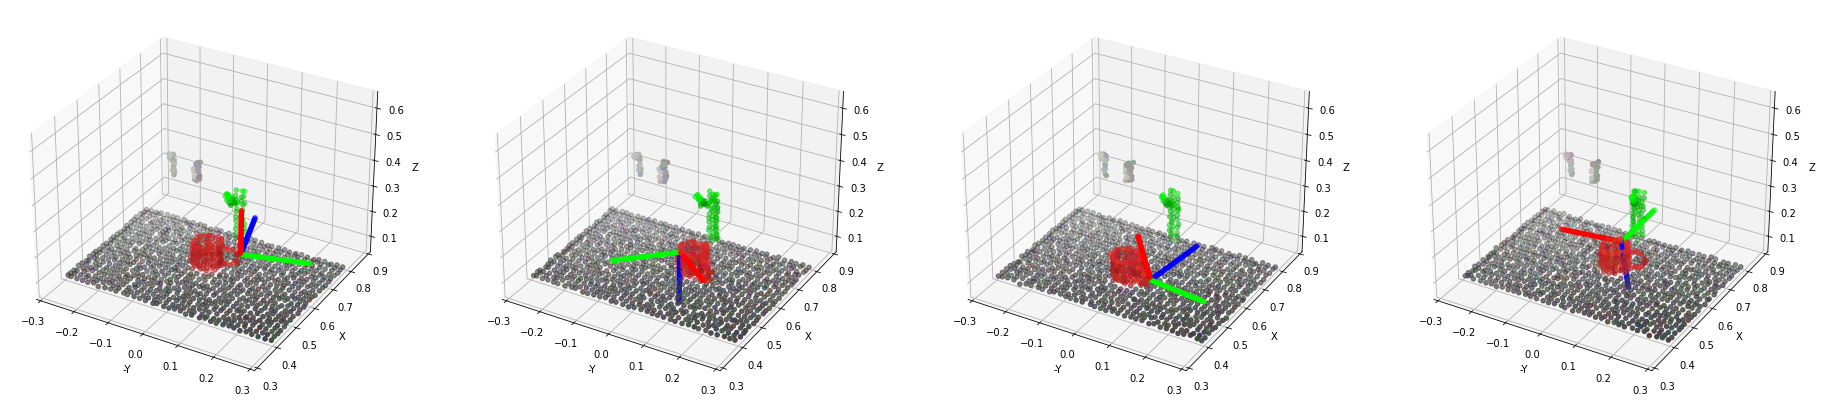

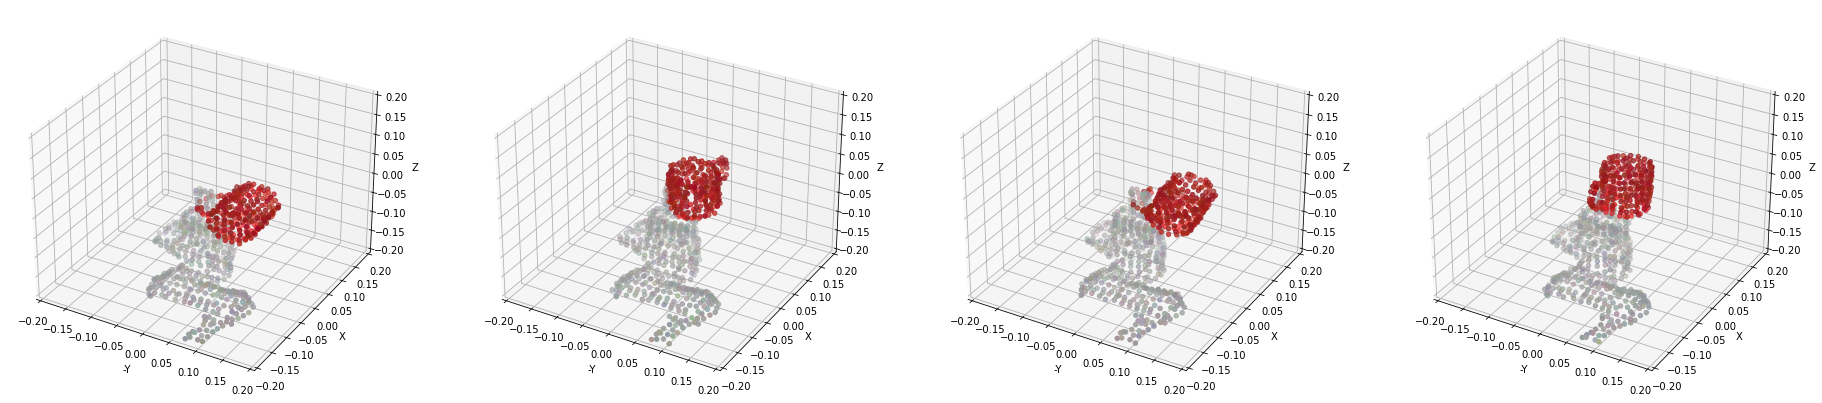

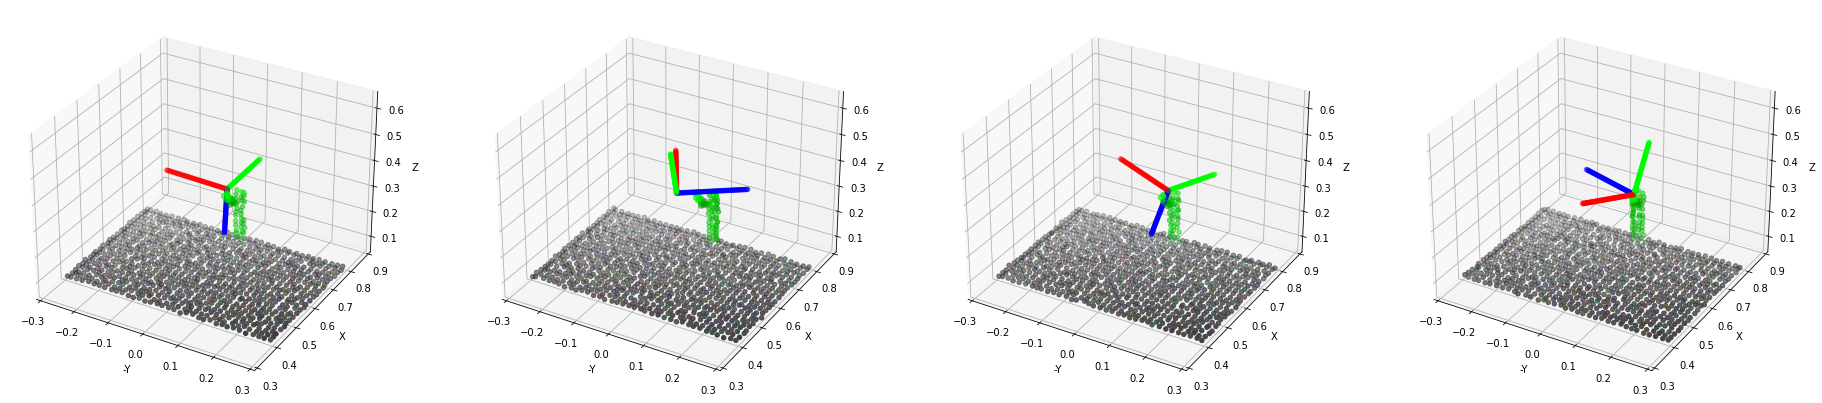

In [5]:
voxelized_samples = []
for sample in samples[:4]:
    sample = voxelize_sample(sample, coord_jitter=0.1, color_jitter=0.03)
    voxelized_samples.append(sample)
visualize_samples(voxelized_samples)

# Visualize Neighbor Clusterning

- Blue points are the neighboring nodes to the green point.
- Neighboring nodes are the points within max_radius
- Therefore, max_radius effectively defines the receptive field size of the layer.
- Increasing max_radius will result in quadratic growth of graph edge numbers and so does the memory usage.
- Decreasing max_radius will harm the receptive field size of the layer but effectively reduces memory consumption.
- We use 6-layer SE(3)-Transformer, so the receptive field of the model is 6x larger than the single layer receptive fields, which are visualized as blue points below. 
- Note that this is sufficiently large to cover the whole mug, but not the whole scene.

Number of Edges: 21052
Number of Edges: 28942
Number of Edges: 16750


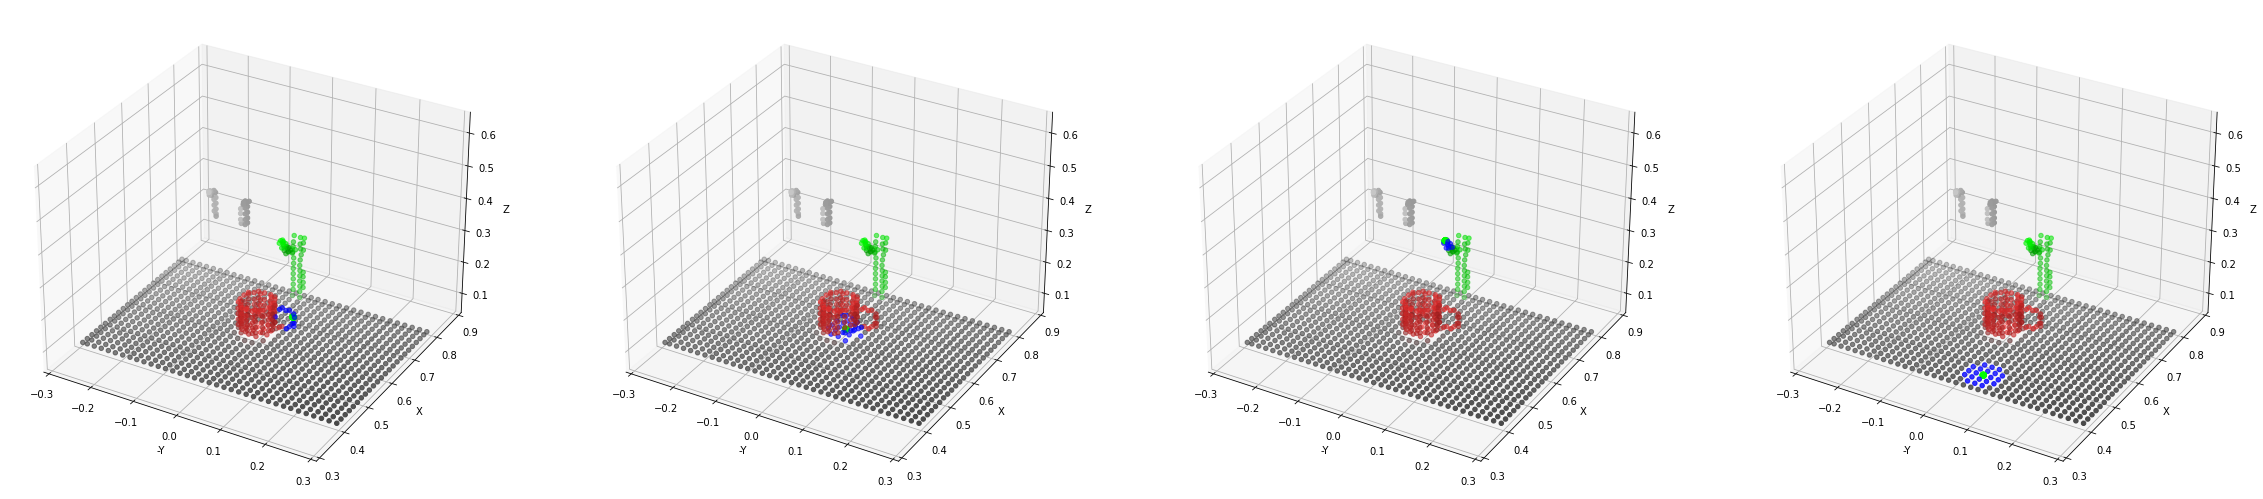

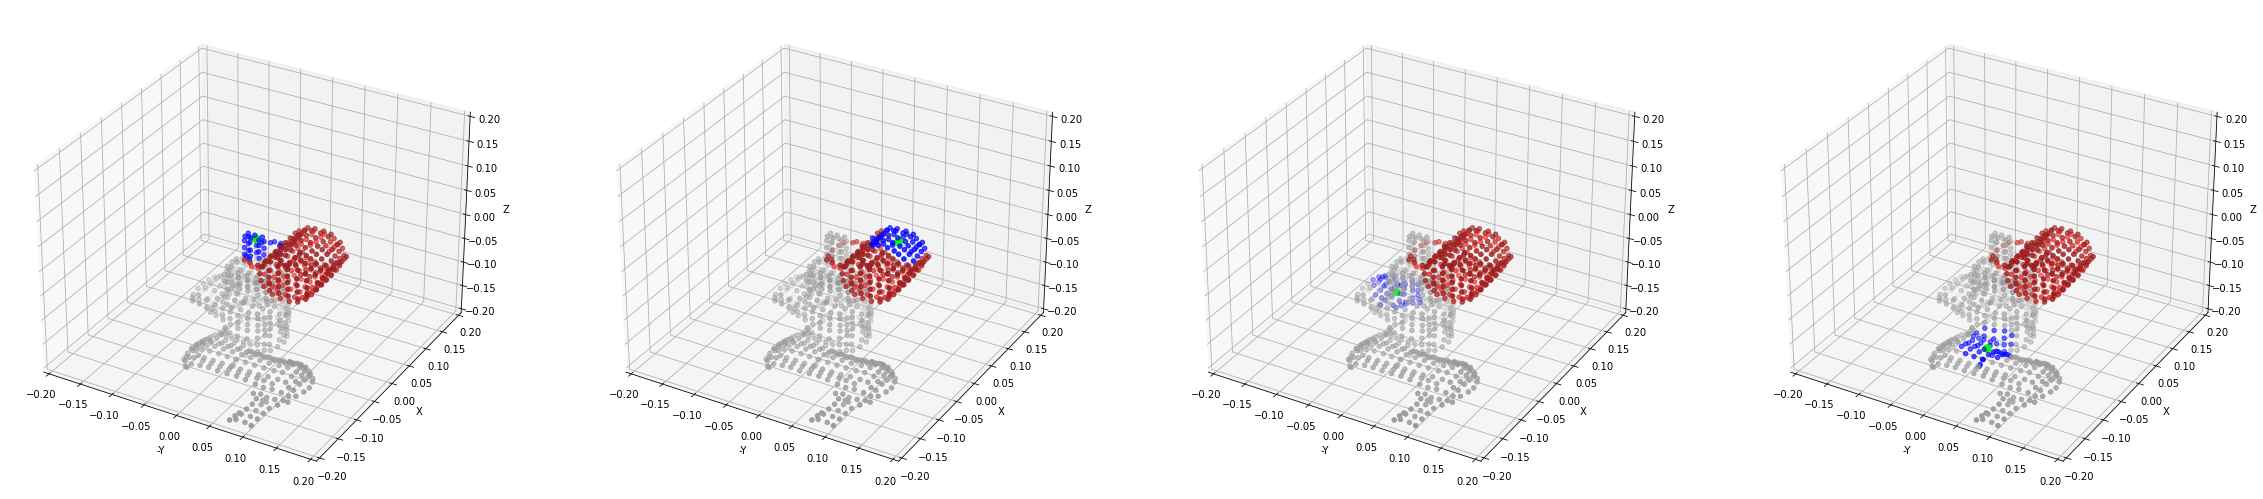

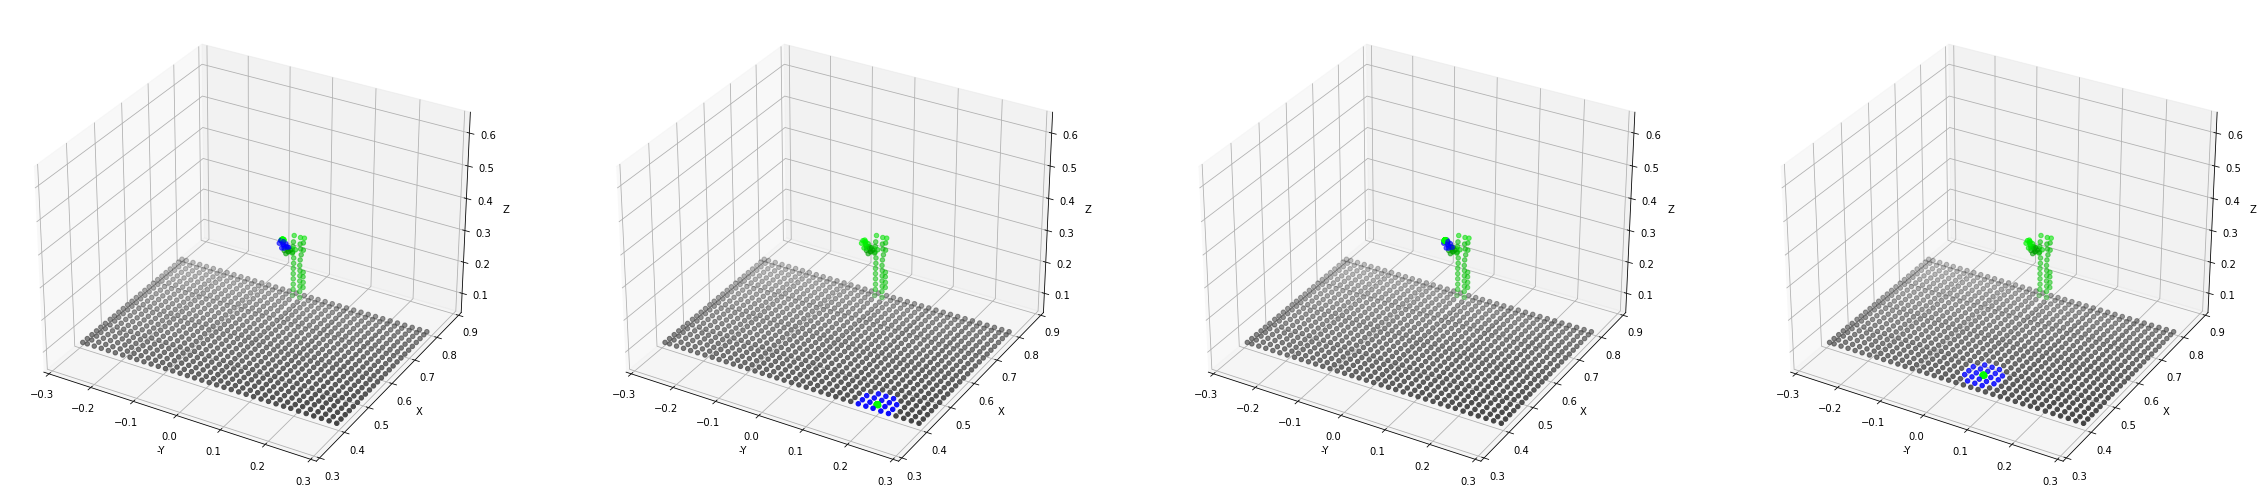

In [6]:
sample = voxelize_sample(samples[0])
visualize_sample_cluster(sample, max_radius=0.04, max_radius_pick=0.04, max_radius_place=0.04, figsize = 10)